In [1]:
import PIL.Image
import pytesseract
import numpy as np
import cv2
import string
import re
import nltk
import matplotlib.pyplot as plt

In [2]:
#nltk.download()

In [2]:
myconfig = r"--psm 3 --oem 3"

In [3]:
text = pytesseract.image_to_string(PIL.Image.open("tugas.jpg"), config=myconfig)
print(text)

Studi Kasus

pembukaan daftar wisuda dan pelaksanaan nya lebih baik d umumkan di web tidak hanya di fakultas.
sehingga memudahkan mahasiswa yang ada di luar kota. pelaksanaan wisuda sebaiknya terjadwal
tidak tergantung pada kuota. sehingga lebih cepat mendapat ijazah.

dalam setahun belakangan ini, pengaksesan KRS diganti ke SIAM (sebelumnya menggunakan
SINERGI). saat menggunakan sinergi, fitur serta kecepatan akses sangat handal dan nyaman. tapi
setelah digarti menggunakan SIAM, keadaan berbaik menjad buruk (lambat loading dan bahkan
sampai logout dengan sendirinya). *KRS tidak hanya berpengaruh bagi mahasiswa semester muda tapi

juga keseluruhan mahasiswa

Assalamualaikum Wr. Wb. yang menjadi salah satu syarat untuk bisa ujian kompre ada sertifikat
TOEIC, sehingga jika belum lulus toeic maka tidak bisa melakukan ujian kompre. saya rasa ini sangat
menghambat teman-teman yang memang lemah dibidang bahasa inggris (atau yang kurang beruntung
dalam ujian toeic-nya). sehingga mereka tidak 

### OCR menentukan text dengan tepat. Parsing dari Image ke Text sudah dilaksanakan

Hanya diperlukan isi dalam tabel. -> Remove bagian yang tidak berguna

In [4]:
text = text[13:]
print(text)

pembukaan daftar wisuda dan pelaksanaan nya lebih baik d umumkan di web tidak hanya di fakultas.
sehingga memudahkan mahasiswa yang ada di luar kota. pelaksanaan wisuda sebaiknya terjadwal
tidak tergantung pada kuota. sehingga lebih cepat mendapat ijazah.

dalam setahun belakangan ini, pengaksesan KRS diganti ke SIAM (sebelumnya menggunakan
SINERGI). saat menggunakan sinergi, fitur serta kecepatan akses sangat handal dan nyaman. tapi
setelah digarti menggunakan SIAM, keadaan berbaik menjad buruk (lambat loading dan bahkan
sampai logout dengan sendirinya). *KRS tidak hanya berpengaruh bagi mahasiswa semester muda tapi

juga keseluruhan mahasiswa

Assalamualaikum Wr. Wb. yang menjadi salah satu syarat untuk bisa ujian kompre ada sertifikat
TOEIC, sehingga jika belum lulus toeic maka tidak bisa melakukan ujian kompre. saya rasa ini sangat
menghambat teman-teman yang memang lemah dibidang bahasa inggris (atau yang kurang beruntung
dalam ujian toeic-nya). sehingga mereka tidak bisa fokus un

## -- CASE FOLDING --

In [5]:
# LOWERCASE \\ Mengubah semua isi teks menjadi lowercase
text = text.lower()

# REMOVING NUMBERS \\ Menghilangkan karakter angka
text = re.sub(r"\d+", "", text)

# REMOVING PUNCTUATION \\ Menghapus tanda baca
text = text.translate(str.maketrans("","",string.punctuation))

# REMOVING WHITE SPACES \\ Menghilangkan karakter kosong
text = text.strip()

print(text)

pembukaan daftar wisuda dan pelaksanaan nya lebih baik d umumkan di web tidak hanya di fakultas
sehingga memudahkan mahasiswa yang ada di luar kota pelaksanaan wisuda sebaiknya terjadwal
tidak tergantung pada kuota sehingga lebih cepat mendapat ijazah

dalam setahun belakangan ini pengaksesan krs diganti ke siam sebelumnya menggunakan
sinergi saat menggunakan sinergi fitur serta kecepatan akses sangat handal dan nyaman tapi
setelah digarti menggunakan siam keadaan berbaik menjad buruk lambat loading dan bahkan
sampai logout dengan sendirinya krs tidak hanya berpengaruh bagi mahasiswa semester muda tapi

juga keseluruhan mahasiswa

assalamualaikum wr wb yang menjadi salah satu syarat untuk bisa ujian kompre ada sertifikat
toeic sehingga jika belum lulus toeic maka tidak bisa melakukan ujian kompre saya rasa ini sangat
menghambat temanteman yang memang lemah dibidang bahasa inggris atau yang kurang beruntung
dalam ujian toeicnya sehingga mereka tidak bisa fokus untuk ujian komprenya teri

### Spliting ( string -> list )

Merubah kalimat (string) ke dalam bentuk list per kata

In [6]:
text_split = text.split()
print(text_split)

['pembukaan', 'daftar', 'wisuda', 'dan', 'pelaksanaan', 'nya', 'lebih', 'baik', 'd', 'umumkan', 'di', 'web', 'tidak', 'hanya', 'di', 'fakultas', 'sehingga', 'memudahkan', 'mahasiswa', 'yang', 'ada', 'di', 'luar', 'kota', 'pelaksanaan', 'wisuda', 'sebaiknya', 'terjadwal', 'tidak', 'tergantung', 'pada', 'kuota', 'sehingga', 'lebih', 'cepat', 'mendapat', 'ijazah', 'dalam', 'setahun', 'belakangan', 'ini', 'pengaksesan', 'krs', 'diganti', 'ke', 'siam', 'sebelumnya', 'menggunakan', 'sinergi', 'saat', 'menggunakan', 'sinergi', 'fitur', 'serta', 'kecepatan', 'akses', 'sangat', 'handal', 'dan', 'nyaman', 'tapi', 'setelah', 'digarti', 'menggunakan', 'siam', 'keadaan', 'berbaik', 'menjad', 'buruk', 'lambat', 'loading', 'dan', 'bahkan', 'sampai', 'logout', 'dengan', 'sendirinya', 'krs', 'tidak', 'hanya', 'berpengaruh', 'bagi', 'mahasiswa', 'semester', 'muda', 'tapi', 'juga', 'keseluruhan', 'mahasiswa', 'assalamualaikum', 'wr', 'wb', 'yang', 'menjadi', 'salah', 'satu', 'syarat', 'untuk', 'bisa', 'u

## -- TOKENIZING --

In [7]:
from nltk.tokenize import word_tokenize 

tokens = nltk.tokenize.word_tokenize(text)
print(tokens)

['pembukaan', 'daftar', 'wisuda', 'dan', 'pelaksanaan', 'nya', 'lebih', 'baik', 'd', 'umumkan', 'di', 'web', 'tidak', 'hanya', 'di', 'fakultas', 'sehingga', 'memudahkan', 'mahasiswa', 'yang', 'ada', 'di', 'luar', 'kota', 'pelaksanaan', 'wisuda', 'sebaiknya', 'terjadwal', 'tidak', 'tergantung', 'pada', 'kuota', 'sehingga', 'lebih', 'cepat', 'mendapat', 'ijazah', 'dalam', 'setahun', 'belakangan', 'ini', 'pengaksesan', 'krs', 'diganti', 'ke', 'siam', 'sebelumnya', 'menggunakan', 'sinergi', 'saat', 'menggunakan', 'sinergi', 'fitur', 'serta', 'kecepatan', 'akses', 'sangat', 'handal', 'dan', 'nyaman', 'tapi', 'setelah', 'digarti', 'menggunakan', 'siam', 'keadaan', 'berbaik', 'menjad', 'buruk', 'lambat', 'loading', 'dan', 'bahkan', 'sampai', 'logout', 'dengan', 'sendirinya', 'krs', 'tidak', 'hanya', 'berpengaruh', 'bagi', 'mahasiswa', 'semester', 'muda', 'tapi', 'juga', 'keseluruhan', 'mahasiswa', 'assalamualaikum', 'wr', 'wb', 'yang', 'menjadi', 'salah', 'satu', 'syarat', 'untuk', 'bisa', 'u

### Frequency

Menghitung berapa sering kata-kata muncul

In [9]:
kemunculan = nltk.FreqDist(tokens)
print(kemunculan.most_common())

[('tidak', 5), ('dan', 4), ('sehingga', 4), ('yang', 4), ('ujian', 4), ('di', 3), ('mahasiswa', 3), ('menggunakan', 3), ('bisa', 3), ('saya', 3), ('wisuda', 2), ('pelaksanaan', 2), ('lebih', 2), ('hanya', 2), ('ada', 2), ('dalam', 2), ('ini', 2), ('krs', 2), ('siam', 2), ('sinergi', 2), ('sangat', 2), ('tapi', 2), ('dengan', 2), ('untuk', 2), ('kompre', 2), ('toeic', 2), ('terima', 2), ('kasih', 2), ('biaya', 2), ('pembukaan', 1), ('daftar', 1), ('nya', 1), ('baik', 1), ('d', 1), ('umumkan', 1), ('web', 1), ('fakultas', 1), ('memudahkan', 1), ('luar', 1), ('kota', 1), ('sebaiknya', 1), ('terjadwal', 1), ('tergantung', 1), ('pada', 1), ('kuota', 1), ('cepat', 1), ('mendapat', 1), ('ijazah', 1), ('setahun', 1), ('belakangan', 1), ('pengaksesan', 1), ('diganti', 1), ('ke', 1), ('sebelumnya', 1), ('saat', 1), ('fitur', 1), ('serta', 1), ('kecepatan', 1), ('akses', 1), ('handal', 1), ('nyaman', 1), ('setelah', 1), ('digarti', 1), ('keadaan', 1), ('berbaik', 1), ('menjad', 1), ('buruk', 1), 

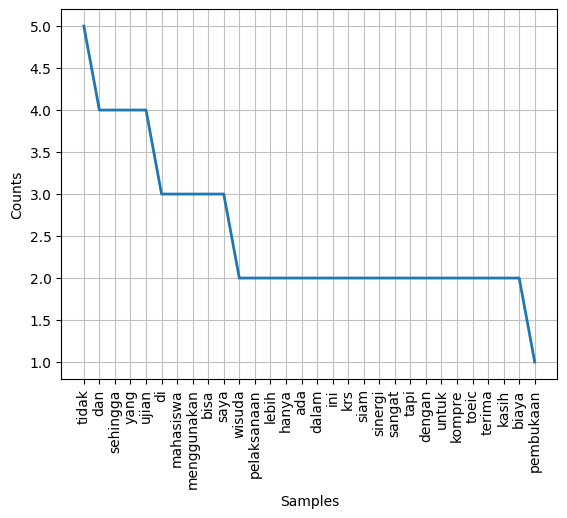

In [10]:
kemunculan.plot(30,cumulative=False)
plt.show()

## -- FILTERING -- 

### Menggunakan NLTK

In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

tokens = word_tokenize(text)
listStopword = set(stopwords.words('indonesian'))

removed = []
for t in tokens:
    if t not in listStopword:
        removed.append(t)
 
print(removed)

['pembukaan', 'daftar', 'wisuda', 'pelaksanaan', 'nya', 'd', 'umumkan', 'web', 'fakultas', 'memudahkan', 'mahasiswa', 'kota', 'pelaksanaan', 'wisuda', 'terjadwal', 'tergantung', 'kuota', 'cepat', 'ijazah', 'setahun', 'pengaksesan', 'krs', 'diganti', 'siam', 'sinergi', 'sinergi', 'fitur', 'kecepatan', 'akses', 'handal', 'nyaman', 'digarti', 'siam', 'berbaik', 'menjad', 'buruk', 'lambat', 'loading', 'logout', 'krs', 'berpengaruh', 'mahasiswa', 'semester', 'muda', 'mahasiswa', 'assalamualaikum', 'wr', 'wb', 'salah', 'syarat', 'ujian', 'kompre', 'sertifikat', 'toeic', 'lulus', 'toeic', 'ujian', 'kompre', 'menghambat', 'temanteman', 'lemah', 'dibidang', 'bahasa', 'inggris', 'beruntung', 'ujian', 'toeicnya', 'fokus', 'ujian', 'komprenya', 'terima', 'kasih', 'pakbu', 'dosen', 'keringanan', 'biaya', 'proposional', 'spp', 'bu', 'keberatan', 'biaya', 'terima', 'kasih', 'perhatiannya']


### Menggunakan Sastrawi

In [12]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize 

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

text = text.translate(str.maketrans('','',string.punctuation)).lower()

stop = stopword.remove(text)
tokens = nltk.tokenize.word_tokenize(stop)

print(tokens)

['pembukaan', 'daftar', 'wisuda', 'pelaksanaan', 'nya', 'lebih', 'baik', 'd', 'umumkan', 'web', 'hanya', 'fakultas', 'sehingga', 'memudahkan', 'mahasiswa', 'luar', 'kota', 'pelaksanaan', 'wisuda', 'sebaiknya', 'terjadwal', 'tidak', 'tergantung', 'kuota', 'lebih', 'cepat', 'mendapat', 'ijazah', 'dalam', 'setahun', 'belakangan', 'pengaksesan', 'krs', 'diganti', 'siam', 'sebelumnya', 'menggunakan', 'sinergi', 'menggunakan', 'sinergi', 'fitur', 'kecepatan', 'akses', 'sangat', 'handal', 'nyaman', 'tapi', 'setelah', 'digarti', 'menggunakan', 'siam', 'keadaan', 'berbaik', 'menjad', 'buruk', 'lambat', 'loading', 'bahkan', 'sampai', 'logout', 'sendirinya', 'krs', 'hanya', 'berpengaruh', 'mahasiswa', 'semester', 'muda', 'tapi', 'juga', 'keseluruhan', 'mahasiswa', 'assalamualaikum', 'wr', 'wb', 'menjadi', 'salah', 'satu', 'syarat', 'ujian', 'kompre', 'ada', 'sertifikat', 'toeic', 'jika', 'lulus', 'toeic', 'bisa', 'melakukan', 'ujian', 'kompre', 'rasa', 'sangat', 'menghambat', 'temanteman', 'meman

In [14]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['d']
data = stop_factory + more_stopword


dictionary = ArrayDictionary(data)
str2 = StopWordRemover(dictionary)
tokens = nltk.tokenize.word_tokenize(str2.remove(text))
print(tokens)

['pembukaan', 'daftar', 'wisuda', 'pelaksanaan', 'nya', 'lebih', 'baik', 'umumkan', 'web', 'hanya', 'fakultas', 'sehingga', 'memudahkan', 'mahasiswa', 'luar', 'kota', 'pelaksanaan', 'wisuda', 'sebaiknya', 'terjadwal', 'tidak', 'tergantung', 'kuota', 'lebih', 'cepat', 'mendapat', 'ijazah', 'dalam', 'setahun', 'belakangan', 'pengaksesan', 'krs', 'diganti', 'siam', 'sebelumnya', 'menggunakan', 'sinergi', 'menggunakan', 'sinergi', 'fitur', 'kecepatan', 'akses', 'sangat', 'handal', 'nyaman', 'tapi', 'setelah', 'digarti', 'menggunakan', 'siam', 'keadaan', 'berbaik', 'menjad', 'buruk', 'lambat', 'loading', 'bahkan', 'sampai', 'logout', 'sendirinya', 'krs', 'hanya', 'berpengaruh', 'mahasiswa', 'semester', 'muda', 'tapi', 'juga', 'keseluruhan', 'mahasiswa', 'assalamualaikum', 'wr', 'wb', 'menjadi', 'salah', 'satu', 'syarat', 'ujian', 'kompre', 'ada', 'sertifikat', 'toeic', 'jika', 'lulus', 'toeic', 'bisa', 'melakukan', 'ujian', 'kompre', 'rasa', 'sangat', 'menghambat', 'temanteman', 'memang', '

## -- STEMMING --

In [17]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
 
hasil = stemmer.stem(text)
print(hasil)

buka daftar wisuda dan laksana nya lebih baik d umum di web tidak hanya di fakultas sehingga mudah mahasiswa yang ada di luar kota laksana wisuda baik jadwal tidak gantung pada kuota sehingga lebih cepat dapat ijazah dalam tahun belakang ini akses krs ganti ke siam belum guna sinergi saat guna sinergi fitur serta cepat akses sangat handal dan nyaman tapi telah digarti guna siam ada baik menjad buruk lambat loading dan bahkan sampai logout dengan sendiri krs tidak hanya pengaruh bagi mahasiswa semester muda tapi juga seluruh mahasiswa assalamualaikum wr wb yang jadi salah satu syarat untuk bisa uji kompre ada sertifikat toeic sehingga jika belum lulus toeic maka tidak bisa laku uji kompre saya rasa ini sangat hambat temanteman yang memang lemah bidang bahasa inggris atau yang kurang untung dalam uji toeicnya sehingga mereka tidak bisa fokus untuk uji komprenya terima kasih pakbu dosen saya mau minta ringan biaya proposional dan spp soal bu saya berat dengan biaya itu terima kasih atas p